This models cyclic heat transfer using the formulation in Wang et al. 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.axes_grid1 import make_axes_locatable

from pathlib import Path

plt.rcParams.update({'font.size': 22})

In [2]:
L = 1.0
H = 0.5
W = 0.02

Pr = 0.7
viscosity = 1.68e-5
alpha = viscosity/Pr

Re = 180
Dh = 4*H
Um = viscosity*Re/Dh
print(Dh, Um)

2.0 0.0015119999999999999


Setup the meshgrid for the simulation domain

In [3]:
xmin = 0.0
xmax = 1.0

ymin = -0.25
ymax = 0.25

nx, ny = (101, 101)
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)
xv, yv = np.meshgrid(x, y)

Set up the figure parameters

In [4]:
x_size = 12
y_size = 8

savePath = Path('./')

Plot the streamwise velocity

In [5]:
validation_path = Path('./validation_data.csv')
sim_data = pd.read_csv(validation_path)

haggen_path = Path('./haggen_pousselli_heat_transfer.csv')
haggen_data = pd.read_csv(haggen_path)

inlet_data = sim_data[sim_data['Points_0']<=0.0005]
outlet_data = sim_data[sim_data['Points_0']>=0.9995]

inlet_haggen = haggen_data[haggen_data['Points_0']<=0.001]
outlet_haggen = haggen_data[haggen_data['Points_0']>=1.004]

sim_x = sim_data['Points_0'].values
sim_y = sim_data['Points_1'].values-0.51

haggen_x = haggen_data['Points_0'].values
haggen_y = haggen_data['Points_1'].values


182.35833333333335 6.3825416666666674


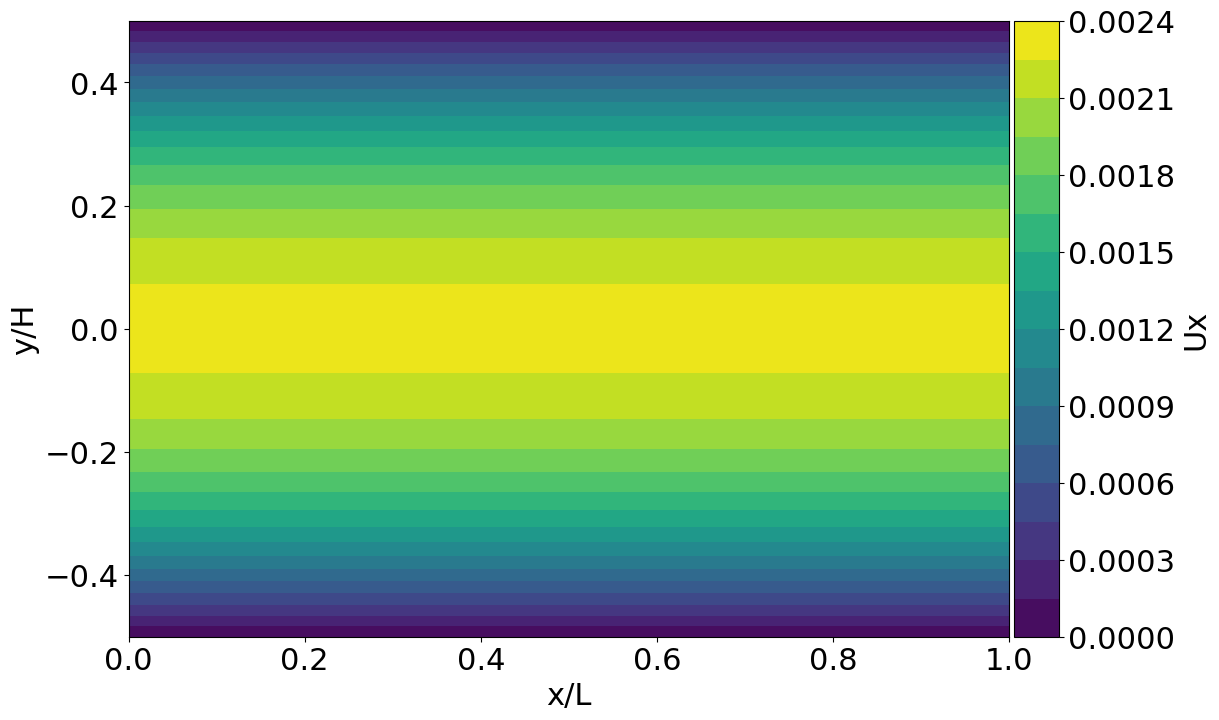

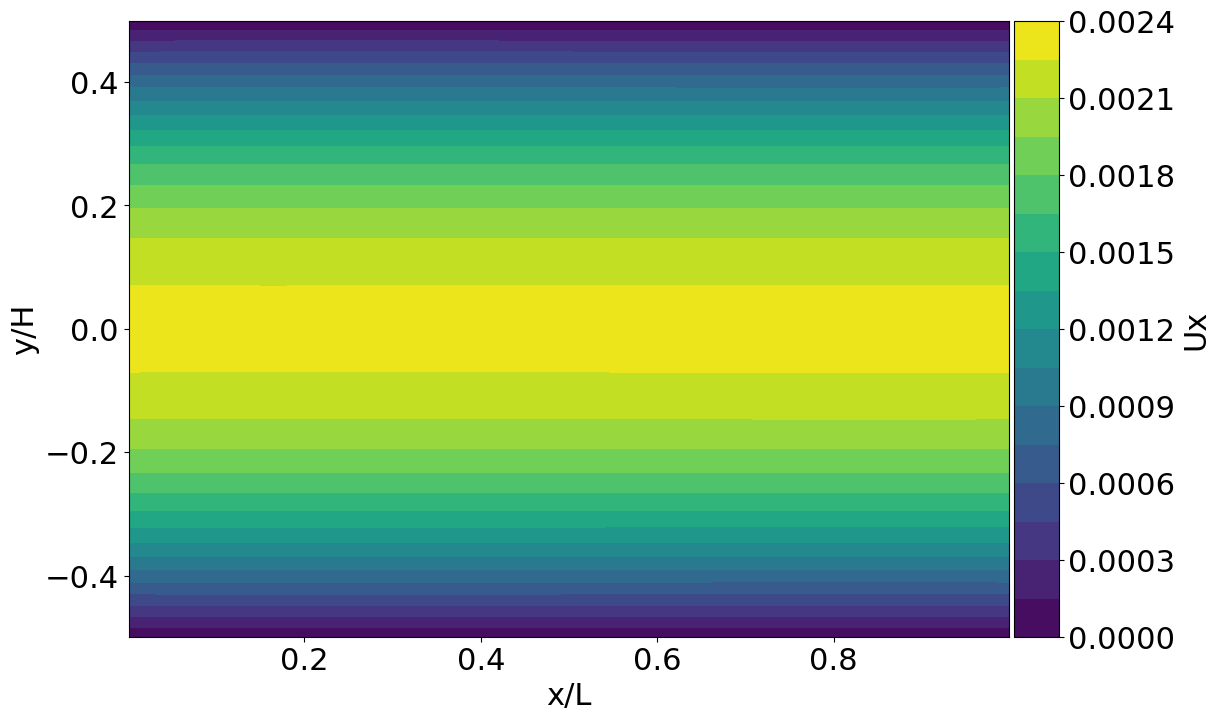

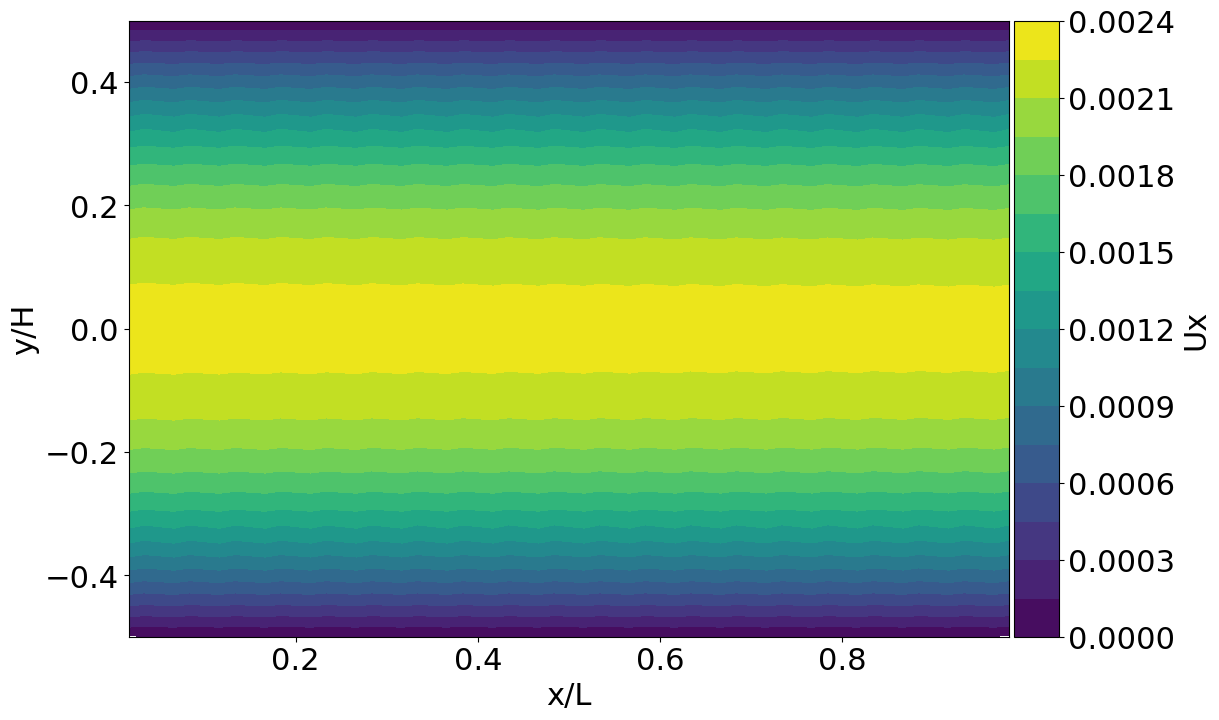

In [6]:
Um = 1.53181e-3
ReD = Um*Dh/viscosity
TEL = 0.05*ReD*Pr
print(ReD, TEL)

Ux = (3/2)*Um*(1 - np.power(2*yv/H, 2))
data_Ux_sim = sim_data['U_0'].values
data_Ux_haggen = haggen_data['U_0'].values

fig1, ax1 = plt.subplots(figsize=(x_size,y_size))

# create the colorbar divider
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)

# tell imshow about color map so that only set colors are used
img_ux_a = ax1.tricontourf(xv.flatten(), yv.flatten()*2, Ux.flatten(),21)
# img = ax1.imshow(Ux/Um,interpolation='nearest',extent=[0,L,-H/2,H/2])

ax1.set_ylabel('y/H')
ax1.set_xlabel('x/L')

# make a color bar
fig1.colorbar(img_ux_a, cax=cax, orientation='vertical', label='Ux')

# fig1.savefig(savePath.joinpath('Ux_analytical_contour.png'), dpi=300, facecolor='w', bbox_inches='tight')

fig2, ax2 = plt.subplots(figsize=(x_size,y_size))

# create the colorbar divider
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)

# tell imshow about color map so that only set colors are used
img_ux_sim = ax2.tricontourf(sim_x/L, sim_y/H, data_Ux_sim,21)
# img = ax1.imshow(Ux/Um,interpolation='nearest',extent=[0,L,-H/2,H/2])

ax2.set_ylabel('y/H')
ax2.set_xlabel('x/L')

# make a color bar
fig2.colorbar(img_ux_sim, cax=cax, orientation='vertical', label='Ux')

# fig2.savefig(savePath.joinpath('Ux_simulation_contour.png'), dpi=300, facecolor='w', bbox_inches='tight')

fig3, ax3 = plt.subplots(figsize=(x_size,y_size))

# create the colorbar divider
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)

# tell imshow about color map so that only set colors are used
img_ux_haggen = ax3.tricontourf(haggen_x/L, haggen_y/H, data_Ux_haggen,21)
# img = ax1.imshow(Ux/Um,interpolation='nearest',extent=[0,L,-H/2,H/2])

ax3.set_ylabel('y/H')
ax3.set_xlabel('x/L')

# make a color bar
fig3.colorbar(img_ux_haggen, cax=cax, orientation='vertical', label='Ux')

# fig3.savefig(savePath.joinpath('Ux_Haggen_contour.png'), dpi=300, facecolor='w', bbox_inches='tight')

ValueError: zero-size array to reduction operation maximum which has no identity

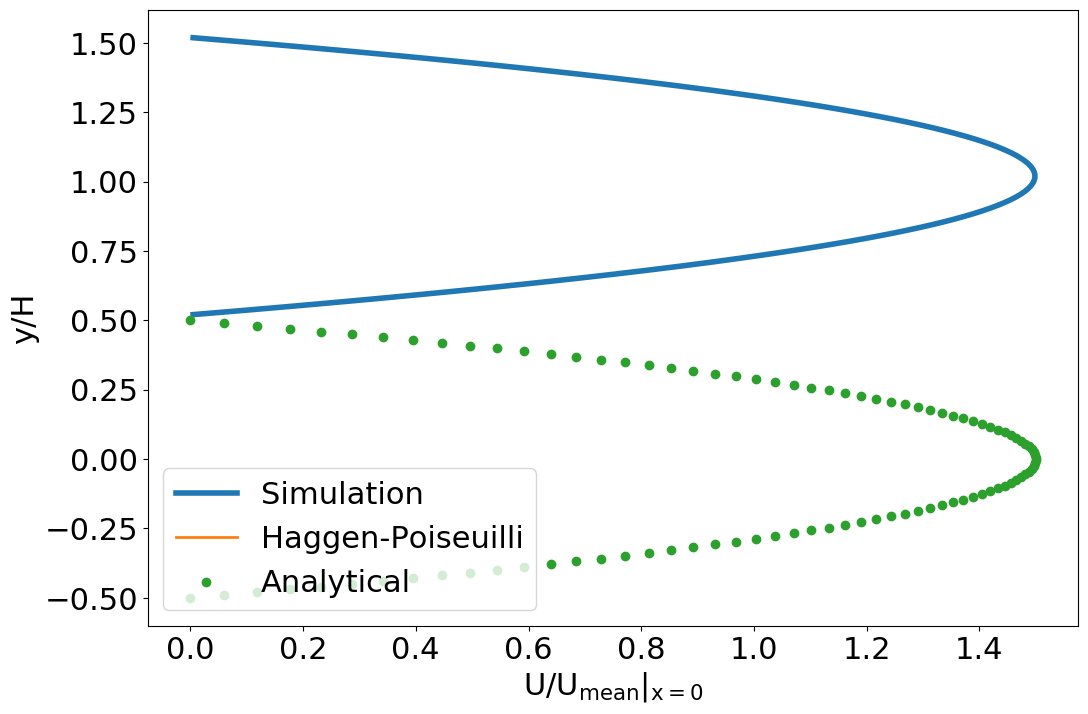

In [7]:
fig4, ax4 = plt.subplots(figsize=(x_size,y_size))

inlet_data_sim = inlet_data.sort_values(by='Points_1')
inlet_Ux_sim = inlet_data_sim['U_0'].values
inlet_y_sim = inlet_data_sim['Points_1'].values-0.51

inlet_data_haggen = inlet_haggen.sort_values(by='Points_1')
inlet_Ux_haggen = inlet_haggen['U_0'].values
inlet_y_haggen = inlet_haggen['Points_1'].values

# plot the velocity profile at the inlet
ax4.plot(np.divide(inlet_Ux_sim,Um), inlet_y_sim/H, linewidth=4, label='Simulation')
ax4.plot(np.divide(inlet_Ux_haggen,Um), inlet_y_haggen/H, linewidth=2, label='Haggen-Poiseuilli')
ax4.plot(np.divide(Ux[:,0],Um), y/H, 'o', label='Analytical')

ax4.set_ylabel('y/H')
ax4.set_xlabel('U/$\mathrm{U_{mean}|_{x=0}}$')
ax4.legend()

print('Umax analytical: %f simulation: %f Haggen-Poiseuilli: %f' % (np.max(np.divide(Ux[:,0],Um)),
     np.max(np.divide(inlet_Ux_sim,Um)), np.max(np.divide(inlet_Ux_haggen,Um))))

# fig4.savefig(savePath.joinpath('Ux_analytical_simulation.png'), dpi=300, facecolor='w', bbox_inches='tight')

In [ ]:
U_normalized_a = np.divide(Ux[:,0],Um)
U_normalized_s_interp = np.interp(y/H, inlet_y_sim/H, np.divide(inlet_Ux_sim,Um))
U_normalized_h_interp = np.interp(y/H, inlet_y_haggen/H, np.divide(inlet_Ux_haggen,Um))

RMSD = {}

RMSD['simulation'] = np.sqrt(np.sum(U_normalized_a-U_normalized_s_interp)**2/U_normalized_a.shape[0])
RMSD['haggen'] = np.sqrt(np.sum(U_normalized_a-U_normalized_h_interp)**2/U_normalized_a.shape[0])

print(RMSD)

In [ ]:
T_sim = sim_data['T'].values
T_haggen = haggen_data['T'].values

Tbulk = 323.15
Tw = 293.15

Re_apostrophe = 2*Um*H/viscosity

lam = 1.675516290994

n = lam**2
m = -(1 + ((8*lam)/(3*Pr*Re_apostrophe))**2)*n

b0 = 1
b1 = m*b0/2
b2 = (m*b1 + n*b0)/(2*3*5)
b3 = (m*b2 + n*b1)/(2*4*7)

T_field = (b0 + (b1*np.power(2*yv/H,2)) + (b2*np.power(2*yv/H,4))
          + (b3*np.power(2*yv/H,6)))*np.exp((-8/3)*lam**2*((2*xv)/(H*Pr*Re_apostrophe)))
T = T_field*1.545
#T = (T_field*(Tbulk-Tw) + Tw)
T = T + (np.abs(Tw - np.min(T.flatten())))

fig4, ax4 = plt.subplots(figsize=(x_size,y_size))

# create the colorbar divider
divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)

# tell imshow about color map so that only set colors are used
img = ax4.tricontourf(xv.flatten()/L, yv.flatten()/H, T.flatten(),20)

ax4.set_ylabel('y/H')
ax4.set_xlabel('x/L')

# make a color bar
fig4.colorbar(img, cax=cax, orientation='vertical', label='T')

# fig4.savefig(savePath.joinpath('T_analytical_contour.png'), dpi=300, facecolor='w', bbox_inches='tight')

fig5, ax5 = plt.subplots(figsize=(x_size,y_size))

# create the colorbar divider
divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)

# tell imshow about color map so that only set colors are used
img_sim_T = ax5.tricontourf(sim_x/L, sim_y/H, T_sim,20)

ax5.set_ylabel('y/H')
ax5.set_xlabel('x/L')

# make a color bar
fig5.colorbar(img_sim_T, cax=cax, orientation='vertical', label='T')

# fig5.savefig(savePath.joinpath('T_simulation_contour.png'), dpi=300, facecolor='w', bbox_inches='tight')

fig6, ax6 = plt.subplots(figsize=(x_size,y_size))

# create the colorbar divider
divider = make_axes_locatable(ax6)
cax = divider.append_axes('right', size='5%', pad=0.05)

# tell imshow about color map so that only set colors are used
img_haggen_T = ax6.tricontourf(haggen_x/L, haggen_y/H, T_haggen,20)

ax6.set_ylabel('y/H')
ax6.set_xlabel('x/L')

# make a color bar
fig6.colorbar(img_haggen_T, cax=cax, orientation='vertical', label='T')

# fig6.savefig(savePath.joinpath('T_Haggen_contour.png'), dpi=300, facecolor='w', bbox_inches='tight')

Plot the streamwise Mixing Cup temperature

In [ ]:
inlet_T_sim = inlet_data['T'].values
inlet_T_haggen = inlet_haggen['T'].values 

outlet_T_sim = outlet_data['T'].values
outlet_T_haggen = outlet_haggen['T'].values 

fig6, ax6 = plt.subplots(figsize=(x_size,y_size))

area_s = 2*H*W
area_a = 2*H
T_mixing_s = np.sum(np.multiply(inlet_Ux_sim, inlet_T_sim)*area_s)/np.sum(inlet_Ux_sim*area_s)
T_mixing_h = np.sum(np.multiply(inlet_Ux_haggen, inlet_T_haggen)*area_s)/np.sum(inlet_Ux_haggen*area_s)
T_mixing_a = np.sum(np.multiply(T[:,0], Ux[:,0])*area_a)/np.sum(Ux[:,0]*area_a)

print(T_mixing_a, T_mixing_s, T_mixing_h)

T_normalized_s = (inlet_T_sim)/T_mixing_s
T_normalized_h = (inlet_T_haggen)/T_mixing_h
T_normalized_a = T[:,0]/T_mixing_a

ax6.plot(T_normalized_s, inlet_y_sim/H, linewidth=4, label="Simulation")
ax6.plot(T_normalized_h, inlet_y_haggen/H, linewidth=2, label="Haggen")
ax6.plot(T_normalized_a, y/H, 'o', label="Analytical")
ax6.set_ylabel('$\mathrm{y/H|_{x=0}}$')
ax6.set_xlabel('$\mathrm{T/T_{mc}|_{x=0}}$')

ax6.legend()

# fig6.savefig(savePath.joinpath('T_analytical_simulation.png'), dpi=300, facecolor='w', bbox_inches='tight')

In [ ]:
T_normalized_s_interp = np.interp(y/H, inlet_y_sim/H, T_normalized_s)
T_normalized_h_interp = np.interp(y/H, inlet_y_haggen/H, T_normalized_h)

fig6, ax6 = plt.subplots(figsize=(10,12))

ax6.plot(inlet_y_sim/H, T_normalized_s, color='C0', label="Simulation")
ax6.plot(y/H, T_normalized_s_interp, 'o', color='C0', label="Simulation_interpolated")

ax6.plot(inlet_y_haggen/H, T_normalized_h, color='C1', label="Haggen")
ax6.plot(y/H, T_normalized_h_interp, 'o', color='C1', label="Haggen_interpolated")

ax6.plot(y/H, T_normalized_a, 'o-', color='C2', label="Analytical")

ax6.set_ylabel('$\mathrm{y/H|_{x=0}}$')
ax6.set_xlabel('$\mathrm{T/T_{mean}|_{x=0}}$')
# ax2.set_xlabel('$\mathrm{T/T_0|_{x=0}}$')
ax6.legend()

In [ ]:
RMSD_s = np.sqrt(np.sum(T_normalized_a-T_normalized_s_interp)**2/T_normalized_a.shape[0])
RMSD_h = np.sqrt(np.sum(T_normalized_a-T_normalized_h_interp)**2/T_normalized_a.shape[0])
print(RMSD_s, RMSD_h)